## learning-AI101 : topic3_2
아래 코드는 모델 만들기 -> compile -> fit을 마친 코드

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import requests
import numpy as np
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

df = tf.keras.datasets.fashion_mnist.load_data()

(train_X, train_y), (test_X, test_y) = df

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anke boot']

# 확률예측문제
# 1) 마지막 레이어 노드수를 카테고리 갯수만큼
# 2) sigmoid or softmax output layer activation 사용하기

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(28, 28), activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Flatten(), # 1D로 바꾸기 (np.reshape())
    tf.keras.layers.Dense(10, activation="softmax"), # 10개로 한 이유가 class_names가 10개니깐
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit (train_X, train_y, epochs=5)

2024-01-26 12:16:30.182062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2619 - accuracy: 0.7816
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4818 - accuracy: 0.8340
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4472 - accuracy: 0.8440
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4186 - accuracy: 0.8512
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3946 - accuracy: 0.8591


--------

저번에 했던거 :   
2차원 데이터로 레이어를 구성하다가 출력층이 1차원으로 나올 수 있게끔 Flatten() 적용  
근데 Flatten을 적용하면 문제점이 있음  
- 이미지를 해체하여 딥러닝을 돌리기 때문에 의미없다
- 예측모델의 응용력도 없어짐
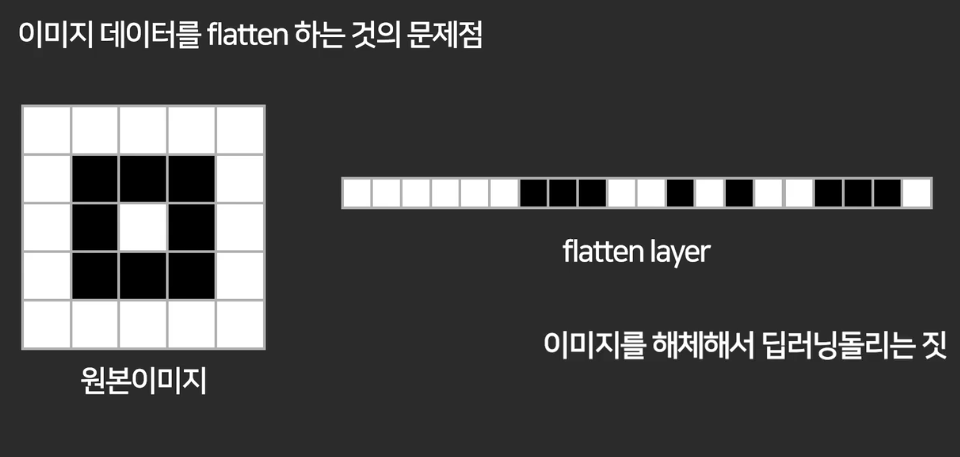
- 전에 학습했던 가중치들이 전혀 상관없어짐

따라서 이미지를 위 방식대로 학습시키는건 적절치 못함 (정확도가 낮다) 
  
해결책 : **convolutional layer (합성곱 신경망)**  
- 1. 이미지에서 중요한 정보를 추려서 복사본 20장을 만든다 (다양한 특성들이 있음)
  2. 그런 특성들을 추출한다 (feature extraction) -> 학습을 시킨다
  * 따라서 앞으로는 이미지를 학습하는 모델에서는 feature extraction이 필요하고,  
    extraction은 convolutional layer로 진행하게 된다 

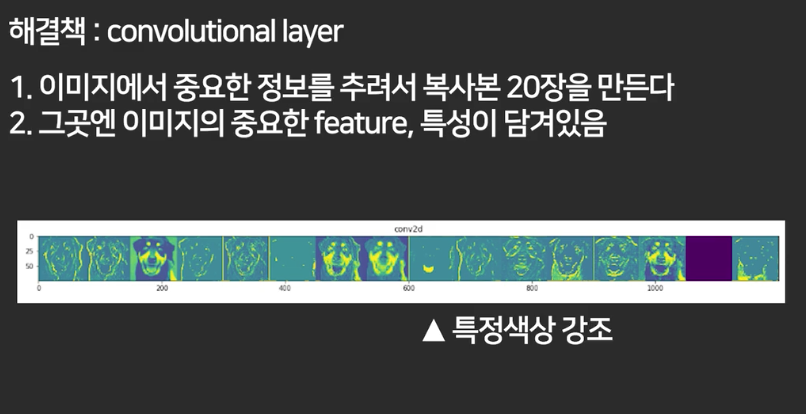

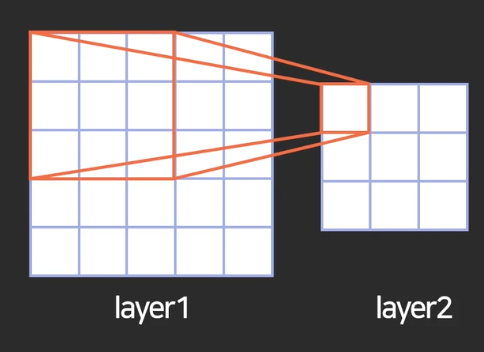

위와 같이 **차원압축**을 통하여 **기존 이미지에서 특성을 추출**  
**차원압축**하는 특정 수식이나 함수 == kernel  
convolutional layer를 만들기 위해선 kernel부터 디자인해야한다 (kernel은 일종의 tensor가 된다)

단순 convolution의 문제점은 **feature의 위치**    
만약에 아래처럼 사진1을 이용해 학습을 했을 때 사진2는 바퀴의 위치가 달라서 
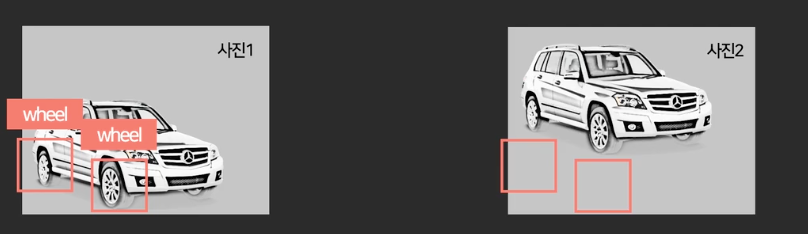